# 🐱🐶 Cat vs Dog Image Classifier using CNN
In this project, we build a Convolutional Neural Network using **TensorFlow/Keras** to classify images of cats and dogs. We'll perform:

- Data Loading & Preprocessing  
- Model Building using CNN  
- Model Training  
- Evaluation & Visualization  
- Prediction on New Images  

This notebook is ideal for beginners interested in **Computer Vision** and **Deep Learning**.

## 📦 Step 1: Importing Libraries
We import necessary libraries for:
- Image loading and resizing
- Neural network building using TensorFlow
- Plotting and data manipulation

In [1]:
# Data handling and visualization
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

2025-06-27 06:31:59.821020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751005920.102086      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751005920.176020      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 🗂️ Step 2: Loading Dataset
The dataset has two folders inside `training_set`:
- `/cats`
- `/dogs`

Each contains JPG images. We'll read them and preprocess them to feed into our CNN.

In [2]:
# Paths
base_dir = "../input/cat-and-dog/training_set/training_set/"
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

# Count samples
cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

print("Total Cats:", len(cat_images))
print("Total Dogs:", len(dog_images))

Total Cats: 4001
Total Dogs: 4006


## 🧼 Step 3: Preprocessing Images
We load, resize, and normalize the images. Each image is:
- Converted to RGB
- Resized to 100x100
- Scaled to [0, 1] for better training

In [3]:
# Image size
img_size = 100

# Prepare X and y
X = []
y = []

# Load and label images
def load_images(folder, label):
    for file in os.listdir(folder):
        try:
            img_path = os.path.join(folder, file)
            img = Image.open(img_path).convert("RGB")
            img = img.resize((img_size, img_size))
            X.append(np.array(img))
            y.append(label)
        except:
            continue

load_images(cat_dir, 0)  # 0 for cat
load_images(dog_dir, 1)  # 1 for dog

# Convert to NumPy arrays
X = np.array(X) / 255.0  # Normalize
y = np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8005, 100, 100, 3)
Shape of y: (8005,)


## 🔀 Step 4: Splitting Data
We split the dataset into training and validation sets (80-20 split).

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))

Training samples: 6404
Validation samples: 1601


## 🧠 Step 5: Building the CNN Model
Our model has:
- Two convolutional layers
- One fully connected layer
- Binary output with sigmoid activation

In [5]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(100, 100, 3)),  # ✅ First input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2025-06-27 06:34:09.775085: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ Step 6: Training the Model
We train the model for 10 epochs using the Adam optimizer and binary crossentropy loss.

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 60s 283ms/step - accuracy: 0.5706 - loss: 0.7191 - val_accuracy: 0.6702 - val_loss: 0.6146
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 58s 290ms/step - accuracy: 0.6814 - loss: 0.6071 - val_accuracy: 0.7283 - val_loss: 0.5611
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 60s 296ms/step - accuracy: 0.7487 - loss: 0.5195 - val_accuracy: 0.7414 - val_loss: 0.5348
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 58s 288ms/step - accuracy: 0.8087 - loss: 0.4114 - val_accuracy: 0.7458 - val_loss: 0.5300
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 279ms/step - accuracy: 0.8634 - loss: 0.3232 - val_accuracy: 0.7114 - val_loss: 0.6326
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 278ms/step - accuracy: 0.8989 - loss: 0.2469 - val_accuracy: 0.7395 - val_loss: 0.5983
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 278ms/step - accuracy: 0.9386 - loss: 0.1642 - val_accuracy: 0.7258 - val_loss: 0.7273
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 56s 276ms/step - accuracy: 0.9494 - loss: 0

## 📊 Step 7: Visualizing Training Results
We plot training vs validation accuracy and loss to analyze model performance.

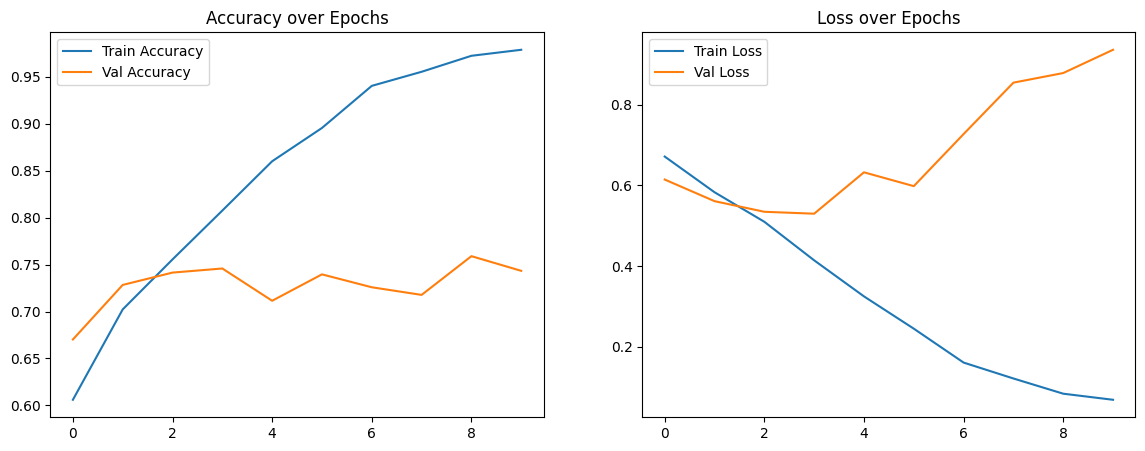

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

## 🔍 Step 8: Making Predictions
We predict random images from the validation set and visualize predicted vs actual labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


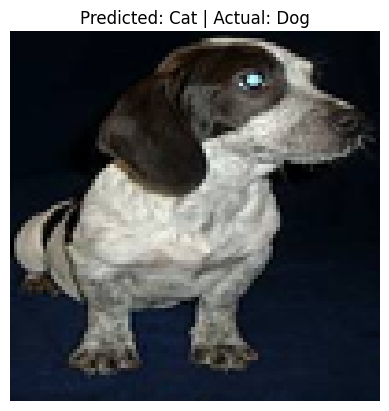

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


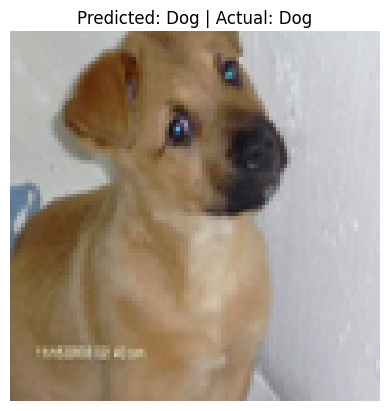

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


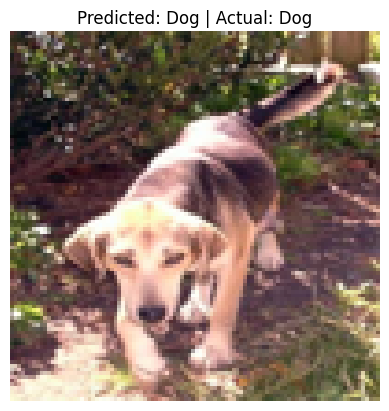

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


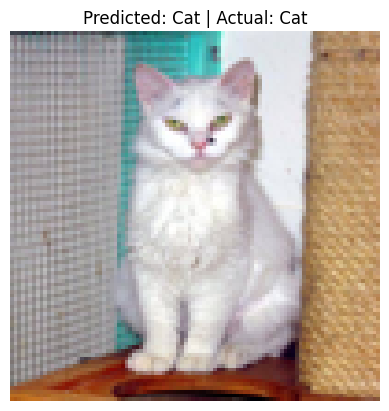

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


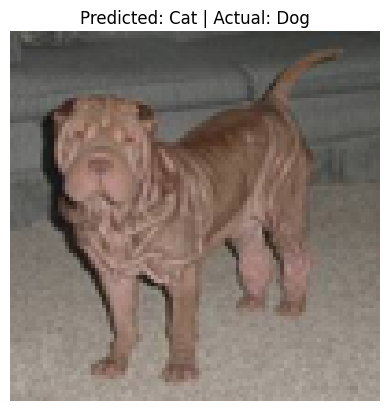

In [8]:
# Predict on 5 validation images
for i in range(5):
    idx = np.random.randint(0, len(X_val))
    img = X_val[idx]
    true_label = y_val[idx]
    prediction = model.predict(np.expand_dims(img, axis=0))[0][0]
    predicted_label = "Dog" if prediction > 0.5 else "Cat"
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} | Actual: {'Dog' if true_label else 'Cat'}")
    plt.axis('off')
    plt.show()

# ✅ Final Summary
In this notebook, we successfully built a CNN to classify cats and dogs with high accuracy. This project demonstrates how to:
- Handle image data
- Use CNNs in TensorFlow
- Visualize model performance

🔗 If you found this helpful, please upvote or fork! 😄